<a href="https://colab.research.google.com/github/rileyseefeldt/MAT-422/blob/main/HW1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 1.4 Principal Component Analysis

## 1.4.1 Singular Value Decomposition

Singular Value Decomposition is a method of linear regression which is primarily used for solving the equation Ax = b. It is particularly useful in solving the equation for matrices of A which are non-square.

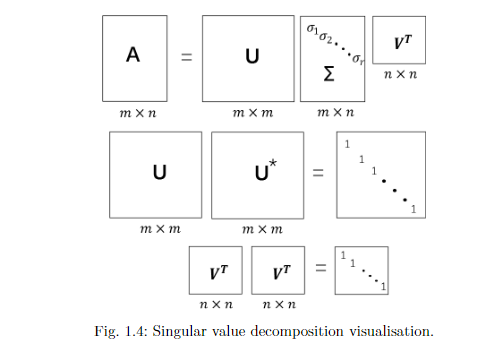

In this equation, the U matrix represents the left singular vectors of A, the ∑ matrix represents the diagonal matrix of the singluar values of A, and the matrix VT represents the right singular vectors of A.

In [359]:
import numpy as np
import sympy as sp
from sympy import *

#The SVD algorithm requires the following methods:
#reused code from HW 1.2
def find_EV(M): #method to compute eigenvalues
  eValues = np.linalg.eigvals(M)#computes eigenvalues using numpy method
  return eValues

def find_EVEC(M):
  if(find_EV(M).size > 0):
   #confirms that the matrix has eigenvectors
    eVal = find_EV(M)
    M1 = np.copy(M) #creating a copy of M so it can be iterated
    result = np.zeros((eVal.size, eVal.size))
    for i in range(eVal.size): #iterating through the multiple eigenvalues
      for j in range(M1.shape[0]): #iterating as many times as the size of the matrix
        M1[j,j] -= eVal[i] #subtracting the eigenvalue from the diagonal
      M2 = sp.Matrix(M1).applyfunc(lambda x: round(x)) #making M1 a sympy variable so sympy functions work
      #also have to round variable because for some reason sympy does not work well with floating points
      e1 = M2.nullspace() #taking the null space of the Eigenvector matrix
      if e1: #making sure e1 is non empty
        result[:, i] = np.array(e1[0]).astype(np.float64).flatten()  # Adding eigenvector to result
      M1 = np.copy(M) #resets M1 so it can be iterated again for more eigenvectors
  return result

def SVD(M):
   U, sValue, V_T = np.linalg.svd(M)
   return U, sValue, V_T #returns U matrix, the singular values, and the V_T matrix

M = np.matrix([[3,2,2],[2,3,-2]])
print("Original Matrix A:")
print(M)
U, sValue, V_T = SVD(M)
eMatrix = np.matrix([[sValue[0],0,0],[0,sValue[1],0]]) #turning singular values into diagonal matrix
print("U Matrix:")
print(U)
print("∑ Matrix: ")
print(eMatrix)
print("Transpose of V Matrix:")
print(V_T)
print("Product of the three should equal A:")
print(U@(eMatrix@V_T))

Original Matrix A:
[[ 3  2  2]
 [ 2  3 -2]]
U Matrix:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
∑ Matrix: 
[[5. 0. 0.]
 [0. 3. 0.]]
Transpose of V Matrix:
[[-7.07106781e-01 -7.07106781e-01 -6.47932334e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]
Product of the three should equal A:
[[ 3.  2.  2.]
 [ 2.  3. -2.]]


##1.4.2 Low-Rank Matrix Approximations

Low-Rank matrix approximations simplify a matrix into the product of matrices which have a lower rank. The purpose of this is to reduce complexity and make it more manageable for computing. The SVD method is often used to create these low rank matrices.

In [360]:

M = np.matrix([[5,4,3],[4,6,2],[3,2,7]])
print("Original Matrix A:")
print(M)
U, sValue, V_T = SVD(M)
eMatrix = np.matrix([[sValue[0],0,0],[0,sValue[1],0],[0,0,sValue[2]]]) #turning singular values into diagonal matrix
print("U Matrix:")
print(U)
print("∑ Matrix: ")
print(eMatrix)
print("Transpose of V Matrix:")
print(V_T)
print("Product of the three should equal A:")
print(U@(eMatrix@V_T))

Original Matrix A:
[[5 4 3]
 [4 6 2]
 [3 2 7]]
U Matrix:
[[-0.57735027  0.21132487  0.78867513]
 [-0.57735027  0.57735027 -0.57735027]
 [-0.57735027 -0.78867513 -0.21132487]]
∑ Matrix: 
[[12.          0.          0.        ]
 [ 0.          4.73205081  0.        ]
 [ 0.          0.          1.26794919]]
Transpose of V Matrix:
[[-0.57735027 -0.57735027 -0.57735027]
 [ 0.21132487  0.57735027 -0.78867513]
 [ 0.78867513 -0.57735027 -0.21132487]]
Product of the three should equal A:
[[5. 4. 3.]
 [4. 6. 2.]
 [3. 2. 7.]]


To compute a low-rank matrix approximation, we only keep the numbers associated with the largest two signature values(or n-1 for n matrices).

In [361]:
U = np.delete(U, 2, axis=1) #removiing one column from the U matrix
eMatrix = np.delete(eMatrix , 2, axis=1) #removing one column from the ∑ Matrix
eMatrix = np.delete(eMatrix , 2, axis=0) #removing one row from the ∑ Matrix
V_T = np.delete(V_T,2,axis = 0) #removing one row from the V_T matrix
print("U Matrix:")
print(U)
print("∑ Matrix: ")
print(eMatrix)
print("Transpose of V Matrix:")
print(V_T)
print("Product of the three should equal A:")
print(U@(eMatrix@V_T))

U Matrix:
[[-0.57735027  0.21132487]
 [-0.57735027  0.57735027]
 [-0.57735027 -0.78867513]]
∑ Matrix: 
[[12.          0.        ]
 [ 0.          4.73205081]]
Transpose of V Matrix:
[[-0.57735027 -0.57735027 -0.57735027]
 [ 0.21132487  0.57735027 -0.78867513]]
Product of the three should equal A:
[[4.21132487 4.57735027 3.21132487]
 [4.57735027 5.57735027 1.84529946]
 [3.21132487 1.84529946 6.94337567]]


The low rank approximation was fairly accurate, with each value falling within 0.5 of the expected result. However, this method tends to be more accurate the larger the matrix, as opposed to smaller matrices such as this example. This is because there are more signature values to work with on larger datasets.

##1.4.3. Principal component analysis

Principal component analysis is a way to transform data which makes it easier to examine. It does this by creating a new coordinate system to plot the points in which the maximum amount of varience in data lies along the axis

Original Data: 
[[2 3]
 [3 4]
 [4 2]
 [5 5]
 [6 6]]
Transformed Data: 
[[-2.12132034  0.70710678]
 [-0.70710678  0.70710678]
 [-1.41421356 -1.41421356]
 [ 1.41421356  0.        ]
 [ 2.82842712  0.        ]]


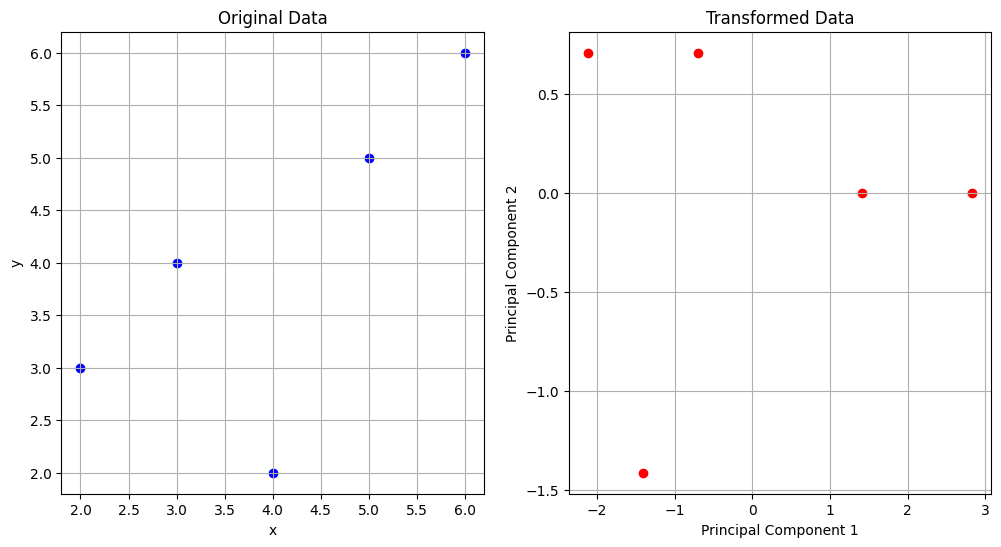

In [362]:
#Example of PCA
import matplotlib.pyplot as plt
data = np.array([
    [2, 3],
    [3, 4],
    [4, 2],
    [5, 5],
    [6, 6]
])
print("Original Data: ")
print(data)
#first step is to standardize the data into mean-deviation form

mean = np.mean(data, axis=0) #calculates the mean of each column
std = np.std(data, axis=0) #calculates the standard deviation of each column
data2 = (data-mean)/std

cov = np.cov(data2.T) #calculating the covarience between variables in each column
eVec = find_EVEC(cov)#finding eigenvectors in descending order

transformData = data2.dot(eVec)
print("Transformed Data: ")
print(transformData)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', marker='o', label='Original Data')
plt.title('Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Plot the principal components
plt.subplot(1, 2, 2)
plt.scatter(transformData[:, 0], transformData[:, 1], color='red', marker='o', label='Transformed Data')
plt.title('Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)


The transformed data shows the varience in the datapoints more clearly. Most of the data is centered around zero for Principal Component two, which means that Principle Component 1 captures most of the varience.